# Clustering

Some examples from https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.figsize'] = (5, 5)
%config InlineBackend.figure_format = 'retina'

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome (Ts65Dn) mice exposed to context fear conditioning.

https://www.kaggle.com/ruslankl/mice-protein-expression

In [2]:
import pandas as pd
mice = pd.read_csv('Data_Cortex_Nuclear.csv')
mice = mice.dropna()
mice

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
75,3415_1,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,...,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,Control,Memantine,C/S,c-CS-m
76,3415_2,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,...,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,Control,Memantine,C/S,c-CS-m
77,3415_3,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,...,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,Control,Memantine,C/S,c-CS-m
78,3415_4,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,...,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,Control,Memantine,C/S,c-CS-m
79,3415_5,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,...,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,3525_11,0.382149,0.595792,0.399101,2.527574,4.629493,0.317810,0.213235,6.219567,0.232639,...,0.122308,0.507017,0.172393,0.200097,0.221994,1.141423,Ts65Dn,Saline,S/C,t-SC-s
1046,3525_12,0.387947,0.586510,0.431650,2.527041,4.781082,0.316903,0.222111,6.307723,0.239074,...,0.121216,0.492432,0.177319,0.207593,0.235223,1.104757,Ts65Dn,Saline,S/C,t-SC-s
1047,3525_13,0.343695,0.562547,0.361243,2.412885,3.949361,0.330158,0.225620,6.060165,0.254951,...,0.121936,0.490258,0.169076,0.182590,0.243715,1.104494,Ts65Dn,Saline,S/C,t-SC-s
1048,3525_14,0.346594,0.551467,0.390353,2.445052,4.236201,0.343610,0.229239,6.023371,0.240676,...,0.136900,0.502282,0.180016,0.199685,0.269866,1.136585,Ts65Dn,Saline,S/C,t-SC-s


In [88]:
behaviorLabels, behaviors = pd.factorize(mice['Behavior'])
behaviors, behaviorLabels

(Index(['C/S', 'S/C'], dtype='object'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

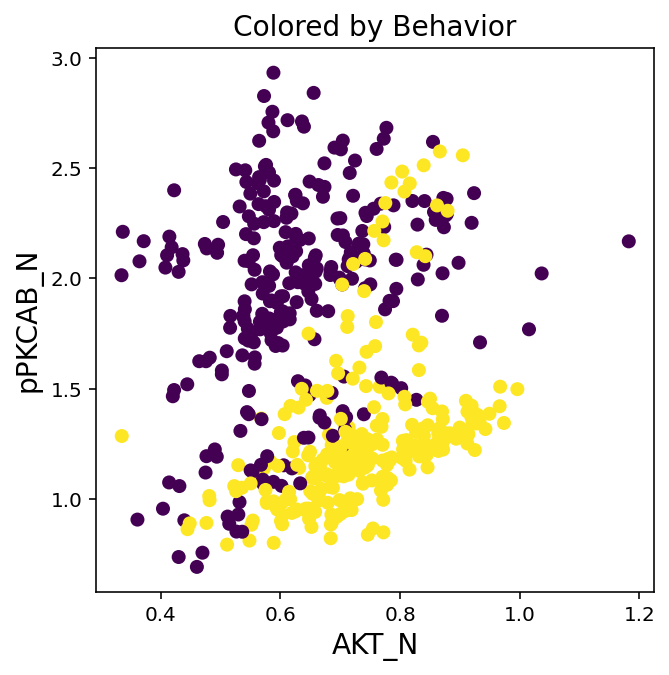

In [89]:
plt.scatter(mice['AKT_N'], mice['pPKCAB_N'], c=behaviorLabels)
plt.xlabel('AKT_N')
plt.ylabel('pPKCAB_N')
plt.title('Colored by Behavior');

## Can we predict whether a mouse underwent behavior training bases solely on expression of AKT_N andd pPKCAB_N?

# $k$-means clustering

1. Choose the number of clusters to use.
2. Choose a random center for each cluster.
3. Put each data point into the cluster whose center it is closest to.
4. Update the cluster centers to the mean of all points in the cluster.
5. Repeat 2-3 until cluster centers converge (i.e. don't change much anymore).

![kmeans EM algorithm](images/kmeans_EM.png "kmeans EM algorithm")

## Can we predict whether a mouse underwent behavior training bases solely on expression of AKT_N andd pPKCAB_N using $k$-means clustering?

In [39]:
from sklearn.cluster import KMeans

In [90]:
# create an instance of the KMeans class and specify how many clusters it should find
kmeans = KMeans(n_clusters=2)

In [91]:
# run the k-means algorithm to cluster the 2-D points into the specified number of clusters
X = mice[['AKT_N', 'pPKCAB_N']]
kmeans.fit(X)

KMeans(n_clusters=2)

In [92]:
# the cluster index that k-means assigned to each point (0, 1, ...)
labels = kmeans.predict(X)

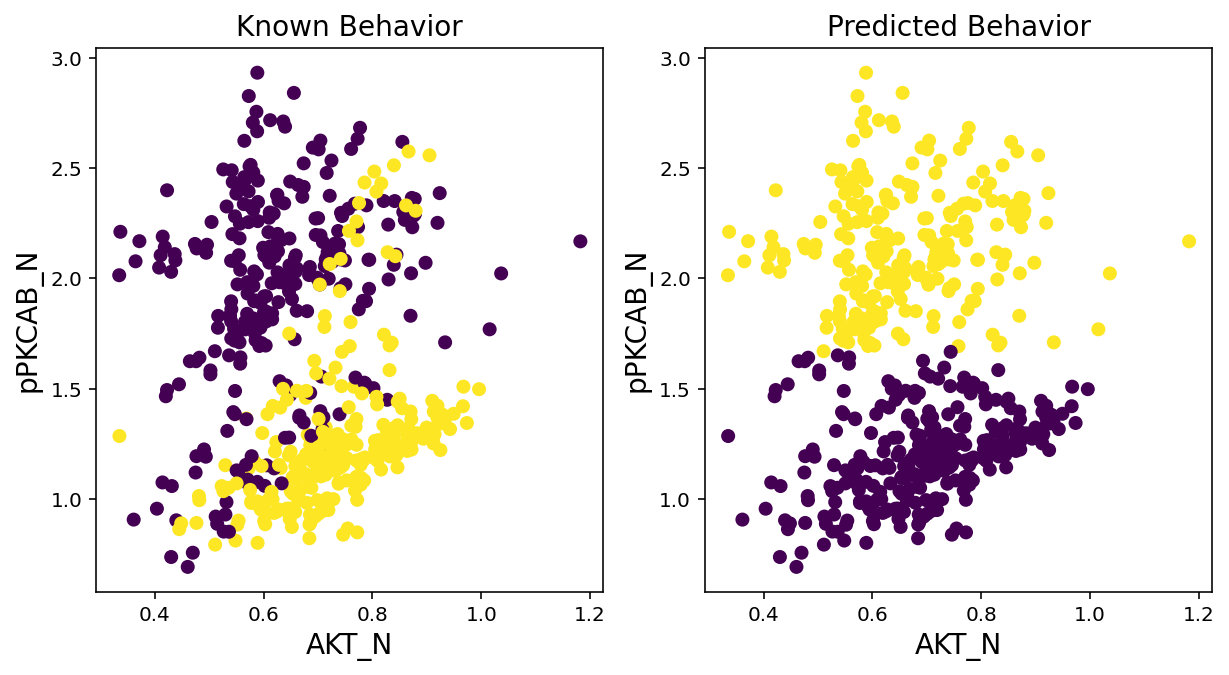

In [93]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(mice['AKT_N'], mice['pPKCAB_N'], c=behaviorLabels)
plt.xlabel('AKT_N')
plt.ylabel('pPKCAB_N')
plt.title('Known Behavior');
plt.subplot(1,2,2)
plt.scatter(mice['AKT_N'], mice['pPKCAB_N'], c=labels)
plt.xlabel('AKT_N')
plt.ylabel('pPKCAB_N')
plt.title('Predicted Behavior');

## Summarizing $k$-means clustering with *sklearn*

In [100]:
model = KMeans(n_clusters=2)
model.fit(X)
labels = model.predict(X)

## A bit more concise...

In [101]:
model = KMeans(n_clusters=2)
labels = model.fit_predict(X)

## A bit more concise...

In [101]:
labels = KMeans(n_clusters=2).fit_predict(X)

## What can we predict about the mice based solely on expression of APP_N andd SOD1_N?

In [102]:
genotypeLabels, genotypes = pd.factorize(mice['Genotype'])
treatmentLabels, treatments = pd.factorize(mice['Treatment'])
behaviorLabels, behaviors = pd.factorize(mice['Behavior'])
classLabels, classes = pd.factorize(mice['class'])

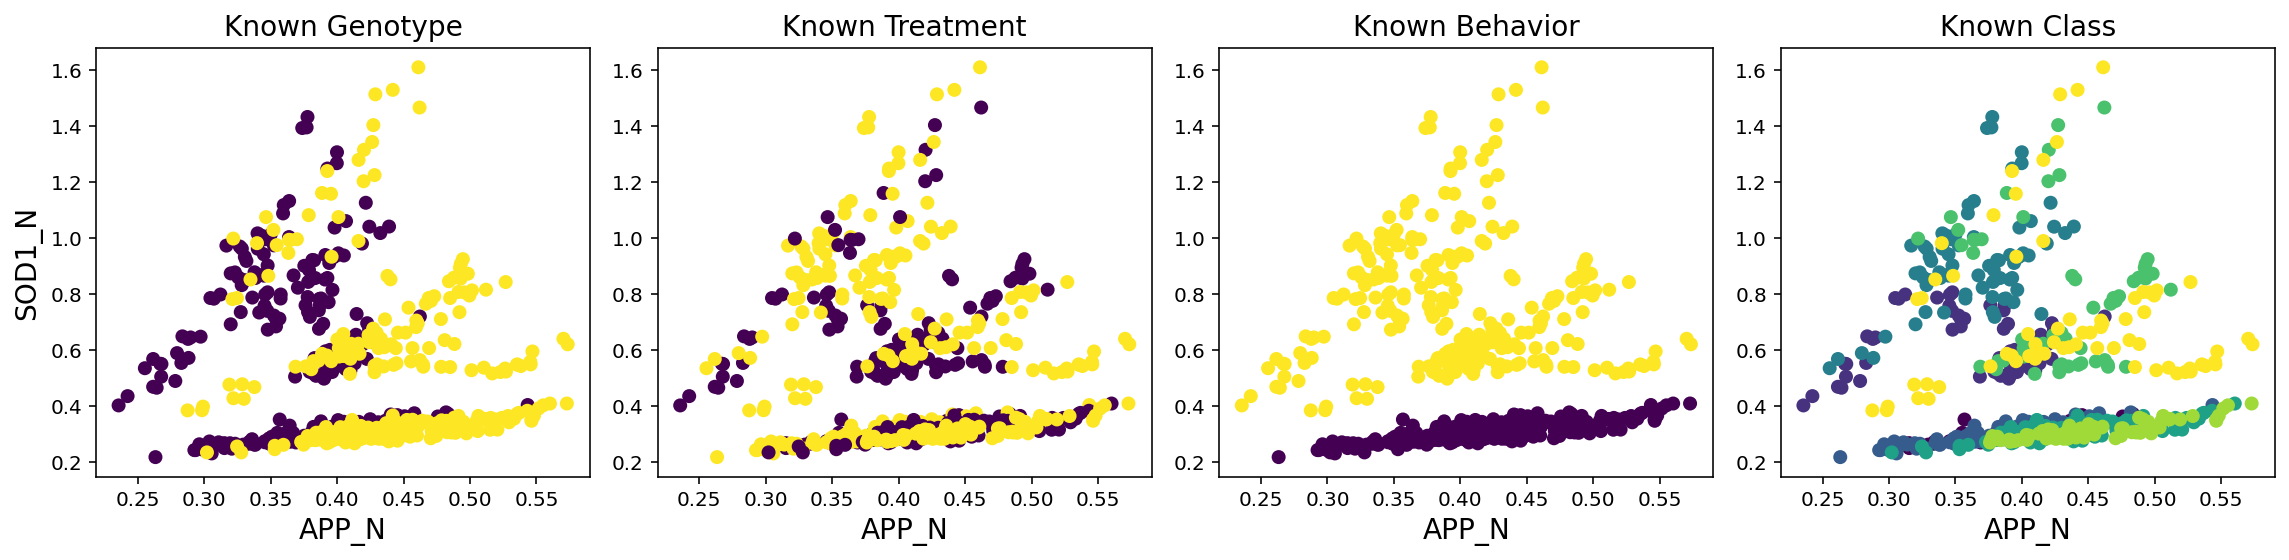

In [103]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.scatter(mice['APP_N'], mice['SOD1_N'], c=genotypeLabels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('Known Genotype');
plt.subplot(1,4,2)
plt.scatter(mice['APP_N'], mice['SOD1_N'], c=treatmentLabels)
plt.xlabel('APP_N')
plt.title('Known Treatment');
plt.subplot(1,4,3)
plt.scatter(mice['APP_N'], mice['SOD1_N'], c=behaviorLabels)
plt.xlabel('APP_N')
plt.title('Known Behavior');
plt.subplot(1,4,4)
plt.scatter(mice['APP_N'], mice['SOD1_N'], c=classLabels)
plt.xlabel('APP_N')
plt.title('Known Class');
plt.tight_layout();

# <font color=darkred>Exercise</font>

Use $k$-means to generate 4 and 8 clusters based on APP_N vs. SOD1_N expression levels.

Store the resulting cluster IDs in the variables `labels4` and `labels8`.

In [104]:
X = mice[['APP_N', 'SOD1_N']]

labels4 = ...

labels8 = ...

# see next cell for plot of results

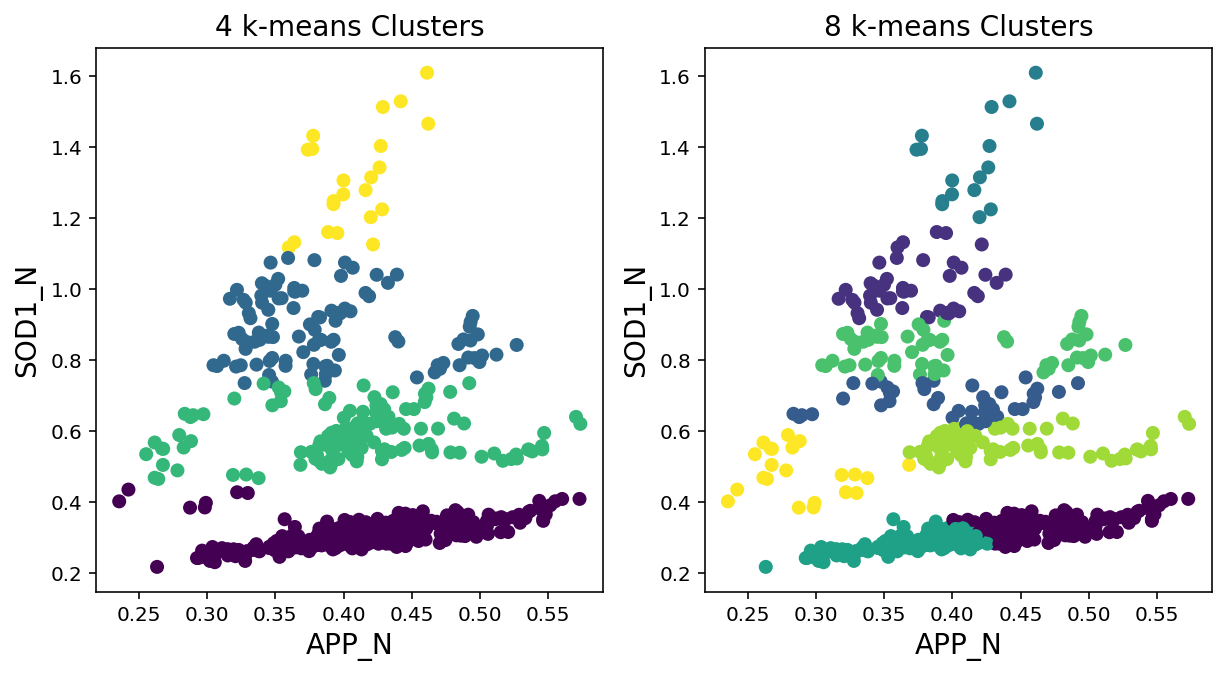

In [105]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(mice['APP_N'], mice['SOD1_N'], c=labels4)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('4 k-means Clusters');
plt.subplot(1,2,2)
plt.scatter(mice['APP_N'], mice['SOD1_N'], c=labels8)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('8 k-means Clusters');

## $k$-means requires you to specify the number of clusters up front.

## $k$-means is meant for clusters that approximate round blobs. For anything else you'll likely need a different algorithm.

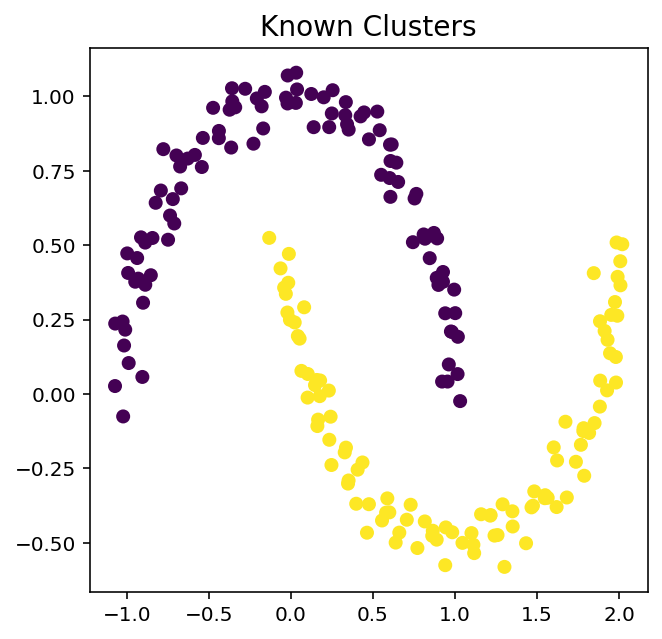

In [107]:
from sklearn.datasets import make_moons

moons, knownLabels = make_moons(200, noise=.05, random_state=0)

plt.scatter(moons[:,0], moons[:,1], c=knownLabels);
plt.title('Known Clusters');

In [108]:
labels = KMeans(n_clusters=2).fit_predict(moons)

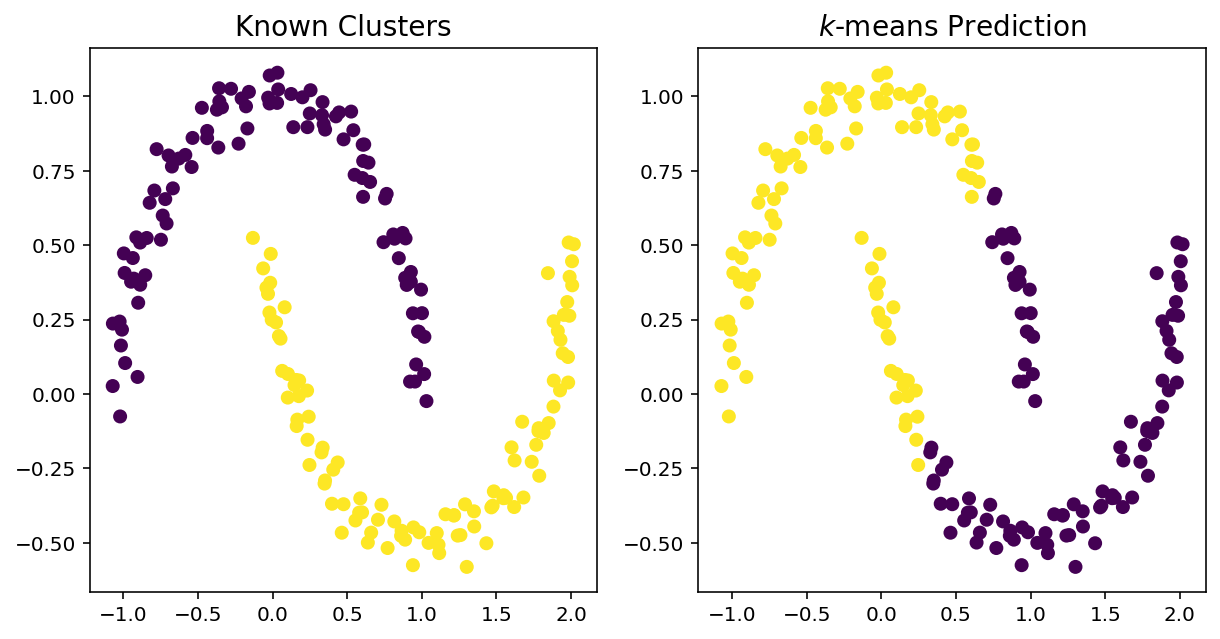

In [109]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(moons[:,0], moons[:,1], c=knownLabels);
plt.title('Known Clusters');
plt.subplot(1,2,2)
plt.scatter(moons[:,0], moons[:,1], c=labels);
plt.title('$k$-means Prediction');

## Other clustering algorithms may be better suited to this type of data.

In [110]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(moons)

/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


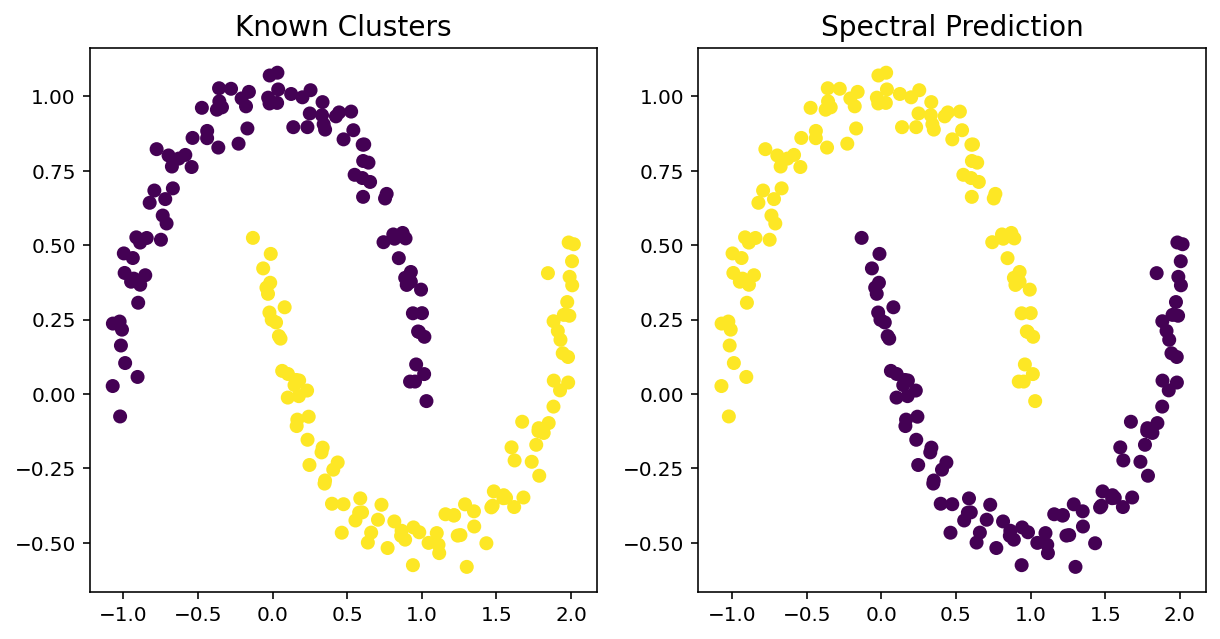

In [111]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(moons[:,0], moons[:,1], c=knownLabels);
plt.title('Known Clusters');
plt.subplot(1,2,2)
plt.scatter(moons[:,0], moons[:,1], c=labels);
plt.title('Spectral Prediction');

---
## No clustering algorithm is perfect for everything. You'll have to assess the pros and cons based on your data.

Here are examples of how several algorithms perform on various types of data.

Some handy info on these methods at https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

Code at https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

![clustering algorithms](images/sphx_glr_plot_cluster_comparison_0011.png "Clustering Algorithms")

# Mean-Shift clustering

1. Start at a random point and specify a radius around that point.
2. Move to the mean of all the points within a specified radius.
3. Repeat 1-2 until converged (point no longer moves).

![mean-shift single window](images/mean-shift_single_window.gif "Mean-Shift Single Window")

## Multiple clusters

* For multiple clusters, start with a grid of points spaced over the entire data.
* Points that converge to locations within their radii are merged.
* Thus, you don't have to specify the numer of clusters, the algorithm will attempt to find the optimal number.
* !!! However, results depend on the selected radius.

![mean-shift many windows](images/mean-shift_many_windows.gif "Mean-Shift Many Windows")

## Pros

* Will automatically find the optimal number of clusters.

## Cons

* Results highly dependent on the specified search radius.

In [114]:
from sklearn.cluster import MeanShift

In [130]:
X = mice[['APP_N', 'SOD1_N']]
model = MeanShift()
labels = model.fit_predict(X)

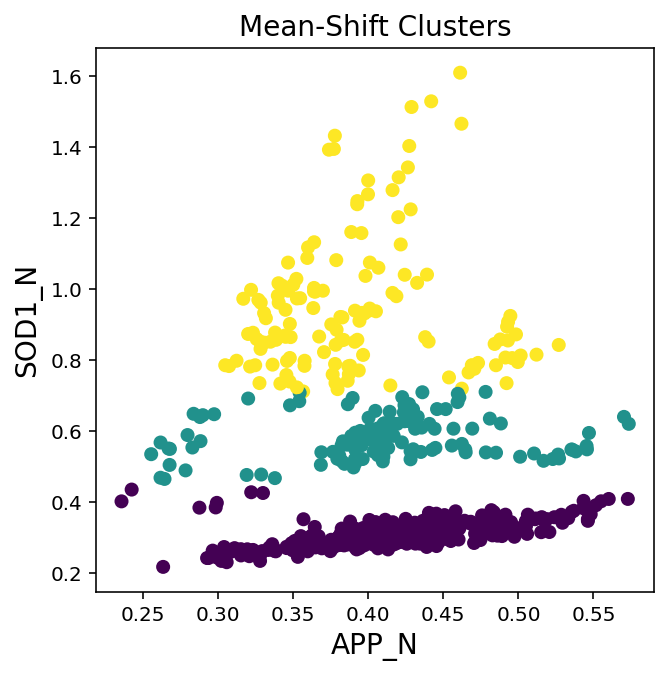

In [131]:
plt.scatter(mice['APP_N'], mice['SOD1_N'], c=labels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('Mean-Shift Clusters');

## Starting clusters in a uniform grid spaced over the data rather than starting with each data point in its own cluster can be significantly faster for larger datasets

In [154]:
import timeit

In [155]:
%%timeit
# start with each data point as its own cluster
model = MeanShift()
labels = model.fit_predict(X)

1.3 s ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [156]:
%%timeit
# start with uniform grid of clusters spread over data points
model = MeanShift(bin_seeding=True)
labels = model.fit_predict(X)

83.6 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## <font color=darkred>Exeercise:</font> Explore changing the radius (bandwidth)

Try setting the bandwidth to either 0.1 or 0.2 and see how this affects your results.

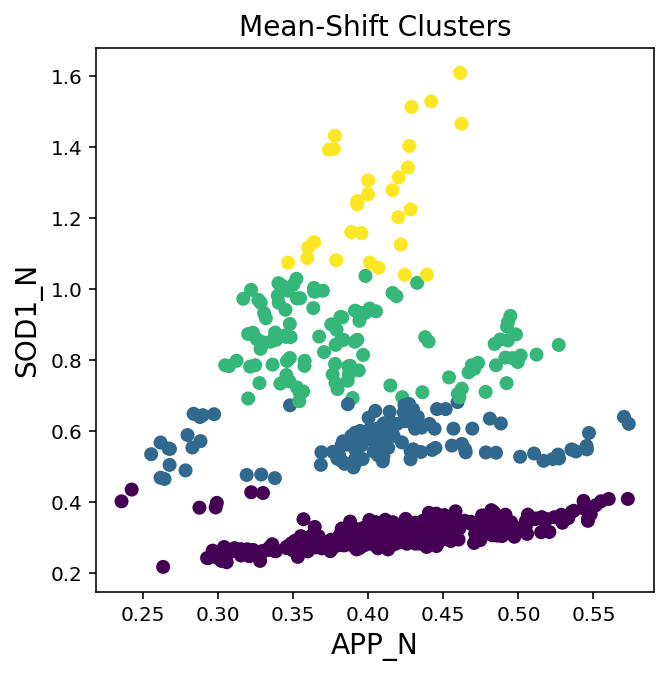

In [151]:
model = MeanShift(bandwidth=0.15, bin_seeding=True)
labels = model.fit_predict(X)

plt.scatter(mice['APP_N'], mice['SOD1_N'], c=labels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('Mean-Shift Clusters');

## Estimating the radius (bandwidth) to use based on pairwise distances in the data

In [161]:
from sklearn.cluster import estimate_bandwidth

# bandwidth estimated from 20% quantile of all pairwise distances
bandwidth = estimate_bandwidth(X, quantile=0.2)
bandwidth

0.13414062383483366

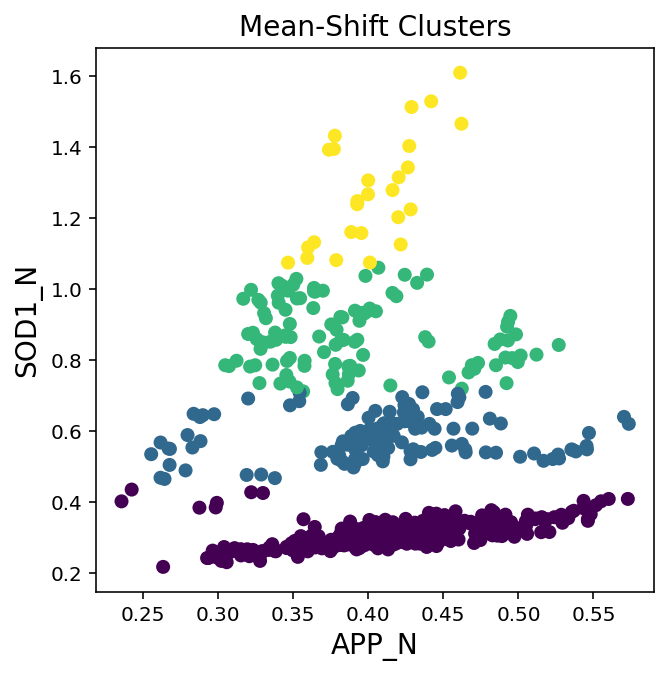

In [162]:
model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels = model.fit_predict(X)

plt.scatter(mice['APP_N'], mice['SOD1_N'], c=labels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('Mean-Shift Clusters');

# <font color=darkred>Exercise</font>

Use mean-shift to cluster the APP_N vs. SOD1_N expression levels. Set the bandwith based on the 30% quantile of all pariwise distances in the data.

Plot the data colored by the predicted cluster.

In [ ]:
X = mice[['APP_N', 'SOD1_N']]

...

# Gaussian Mixture Model (GMM)

* Need to specify the number of clusters.
* Unlike $k$-means which is primarily for round (e.g. circular) blobs, GMMs can fit eliptical blobs.

![GMM](images/gmm.gif "GMM")

## GMM clusters can overlap

![overlap clusters](images/overlapping_gaussians.png "Overlapping Clusters")

## Each data point has a probability to belong to each cluster

![overlap GMM](images/overlapping_gaussians2.png "Overlapping GMM")

In [163]:
from sklearn.mixture import GaussianMixture

In [174]:
X = mice[['APP_N', 'SOD1_N']]
gmm = GaussianMixture(n_components=4)
labels = gmm.fit_predict(X)

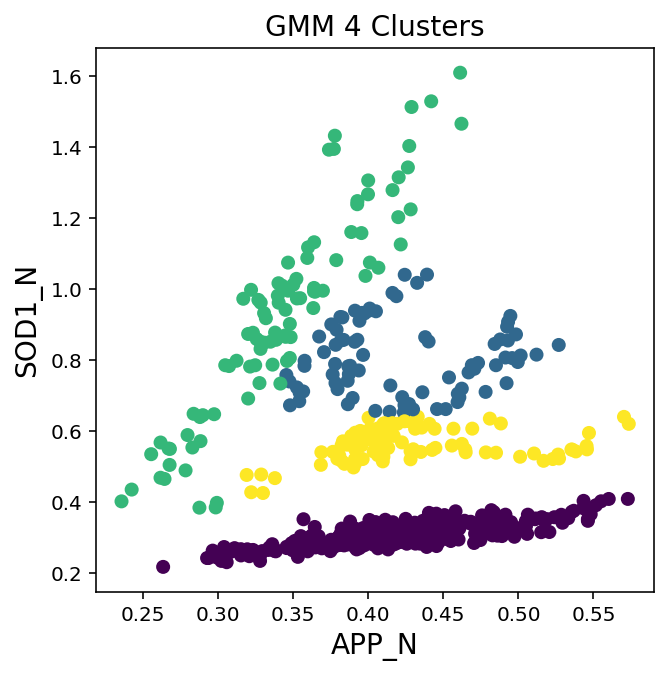

In [175]:
plt.scatter(mice['APP_N'], mice['SOD1_N'], c=labels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('GMM 4 Clusters');

## Probability of each data point belonging to each custer

In [180]:
proba = gmm.predict_proba(X)

proba.round(3)

array([[1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.063, 0.   , 0.937],
       [0.   , 0.063, 0.   , 0.937],
       [0.   , 0.059, 0.   , 0.941]])

---
# Heirarchical Agglomerative clustering

Start with all data points in separate clusters and iteravely combine the closest clusters together. 

![HAC](images/hac.gif "HAC")

* **affinity**: How to compute distances.
    * **euclidean** is the standard measure of distance you are all familiar with.
    * **manhattan** is distance on a grid like walking city blocks
    * etc.
* **linkage**: How to decide wich two clusters to merge next. Always choose to merge the two clusters that minimize the linkage.
    * **ward** minimizes the variance of the clusters being merged.
    * **average** uses the average of the distances of each observation of the two sets.
    * **complete** or maximum linkage uses the maximum distances between all observations of the two sets.
    * **single** uses the minimum of the distances between all observations of the two sets.

In [181]:
from sklearn.cluster import AgglomerativeClustering

In [186]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = model.fit_predict(X)

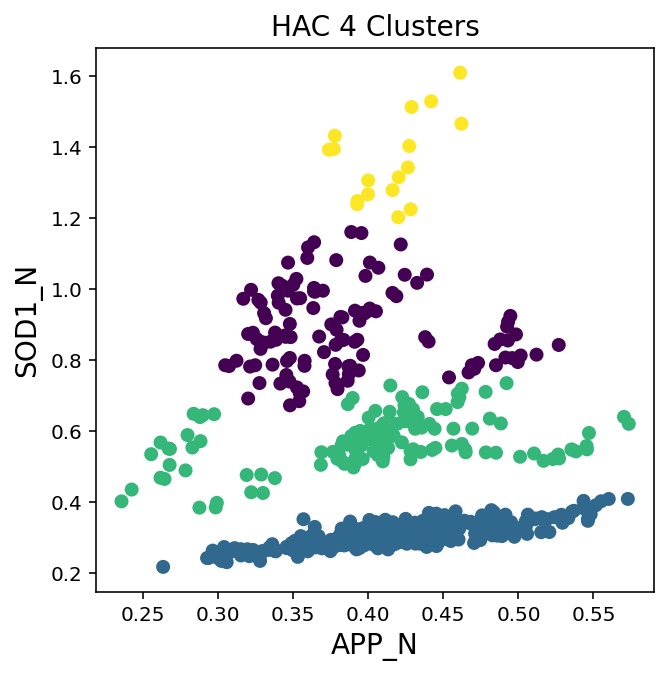

In [187]:
plt.scatter(mice['APP_N'], mice['SOD1_N'], c=labels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('HAC 4 Clusters');

# <font color=darkred>Exercise</font>

Cluster the moons data using HAC with 2 clusters, 'euclidean' affinity and either 'single' or 'ward' linkage. Plot your results. Do the different linkages make a difference?

In [ ]:
X = moons

...

## Heirarchical Agglomerative Clustering Dendrogram

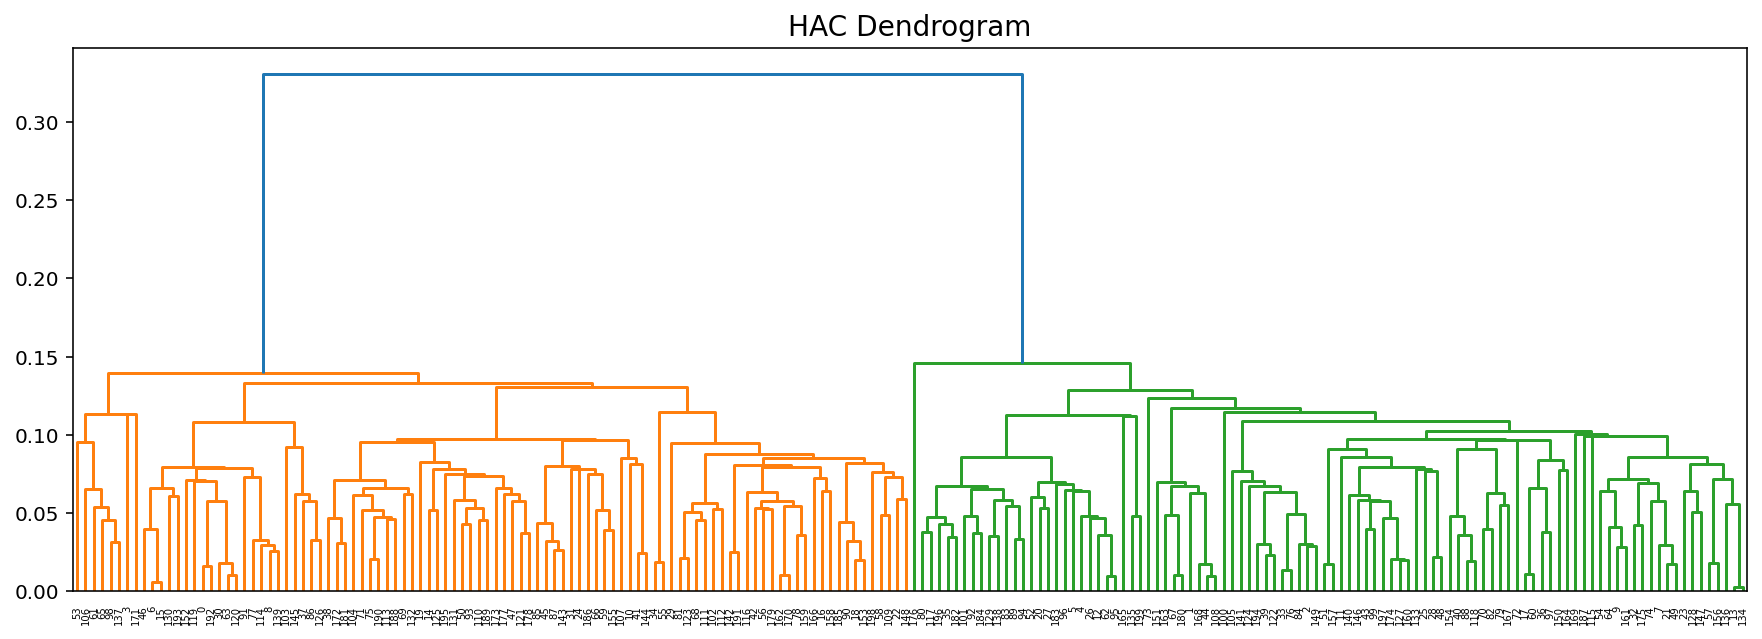

In [188]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 5))
sch.dendrogram(sch.linkage(moons, method='single'));
plt.title('HAC Dendrogram');

---
# Density-Based Spatial Clustering (DBSCAN)

![DBSCAN](images/dbscan.gif "DBSCAN")

In [189]:
from sklearn.cluster import DBSCAN

In [212]:
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(moons)

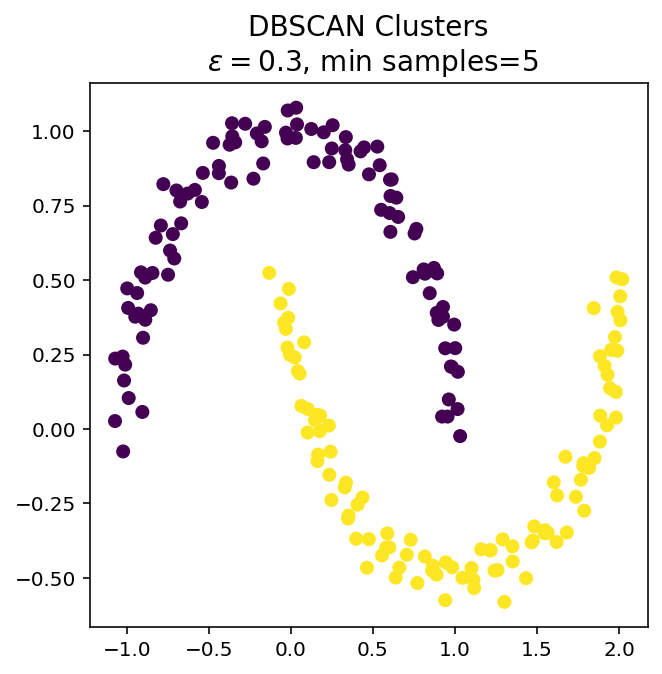

In [213]:
plt.scatter(moons[:,0], moons[:,1], c=labels);
plt.title('DBSCAN Clusters\n $\epsilon=0.3$, min samples=5');

### Cluster size (and number of clusters ) depends on $\epsilon$

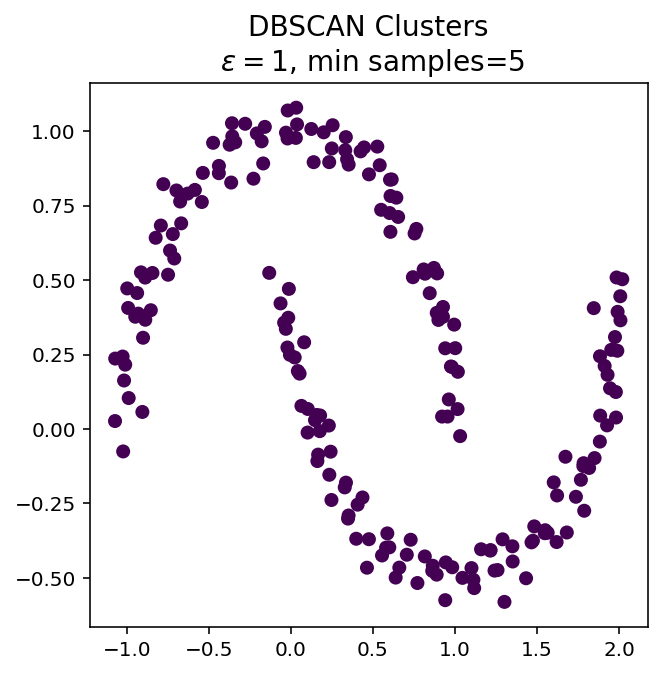

In [222]:
db = DBSCAN(eps=1, min_samples=5)
labels = db.fit_predict(moons)

plt.scatter(moons[:,0], moons[:,1], c=labels);
plt.title('DBSCAN Clusters\n $\epsilon=1$, min samples=5');

### Cluster size (and number of clusters ) depends on $\epsilon$

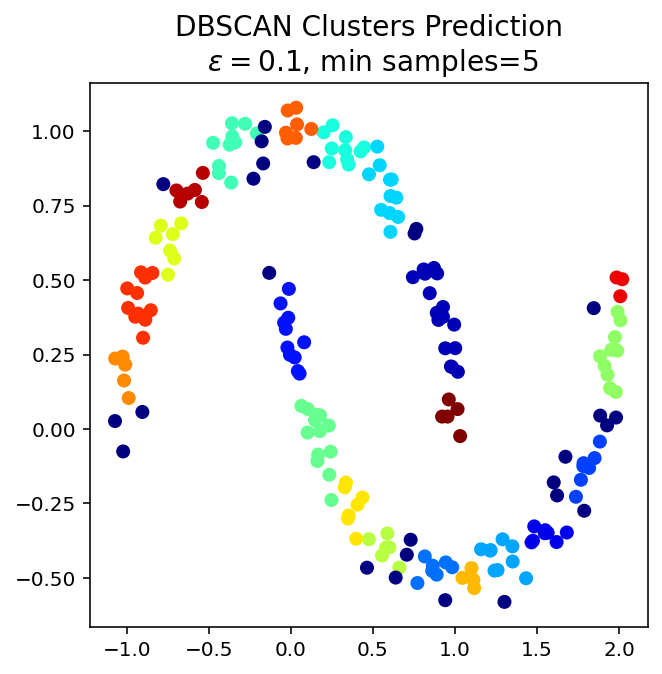

In [226]:
db = DBSCAN(eps=0.1, min_samples=5)
labels = db.fit_predict(moons)

plt.scatter(moons[:,0], moons[:,1], c=labels, cmap='jet');
plt.title('DBSCAN Clusters Prediction\n $\epsilon=0.1$, min samples=5');

# <font color=darkred>Exercise</font>

Use DBSCAN with $\epsilon = 0.1$ and a minimum of 10 samples to cluster the AKT_N vs. pPKCAB_N expression levels.

Plot the data colored by the predicted cluster.

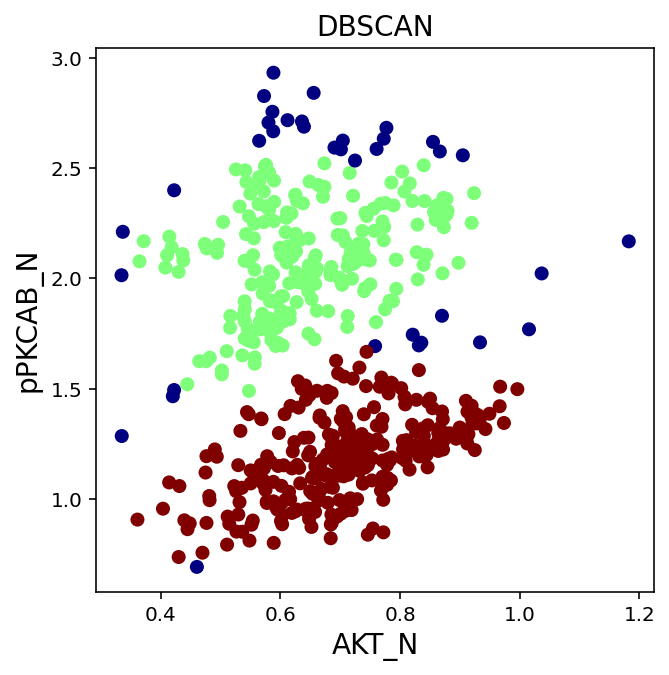

In [237]:
X = mice[['AKT_N', 'pPKCAB_N']]

labels = ...

plt.scatter(mice['AKT_N'], mice['pPKCAB_N'], c=labels, cmap='jet')
plt.xlabel('AKT_N')
plt.ylabel('pPKCAB_N')
plt.title('DBSCAN');

# GMMs: How many components to choose?

In [248]:
X = mice[['APP_N', 'SOD1_N']]
gmm = GaussianMixture(n_components=8)
labels = gmm.fit_predict(X)

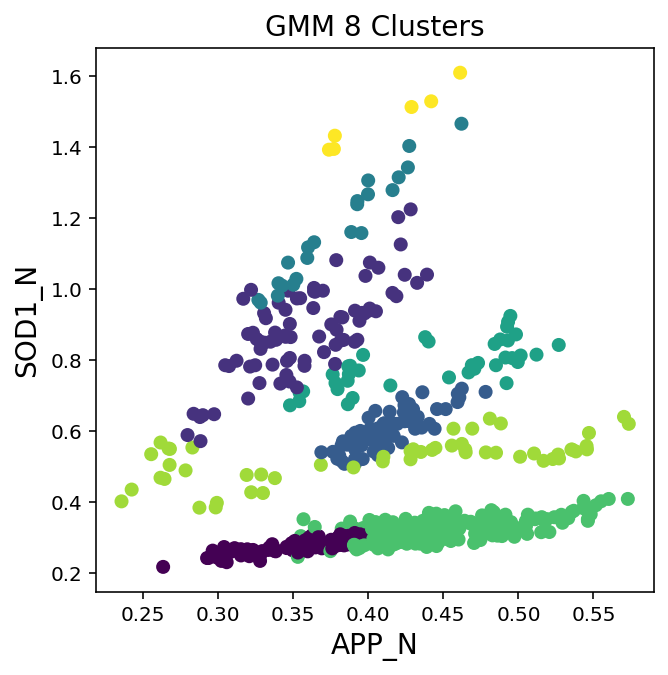

In [249]:
plt.scatter(mice['APP_N'], mice['SOD1_N'], c=labels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title('GMM 8 Clusters');

### Objective functions such as Bayesian Information Criterion (BIC)

### $BIC = ln(n) * k - 2 * ln(L)$

* $k$ = number of model parameters (Gaussian centers, standard deviations, and rotations)
* $n$ = number of data points
* $L$ = likelihood of the model given the data

In [250]:
n_components = np.arange(1, 21)
models = []
for n in n_components:
    models.append(GaussianMixture(n_components=n, random_state=0))

In [251]:
bic = []
for model in models:
    model.fit(X)
    bic.append(model.bic(X))

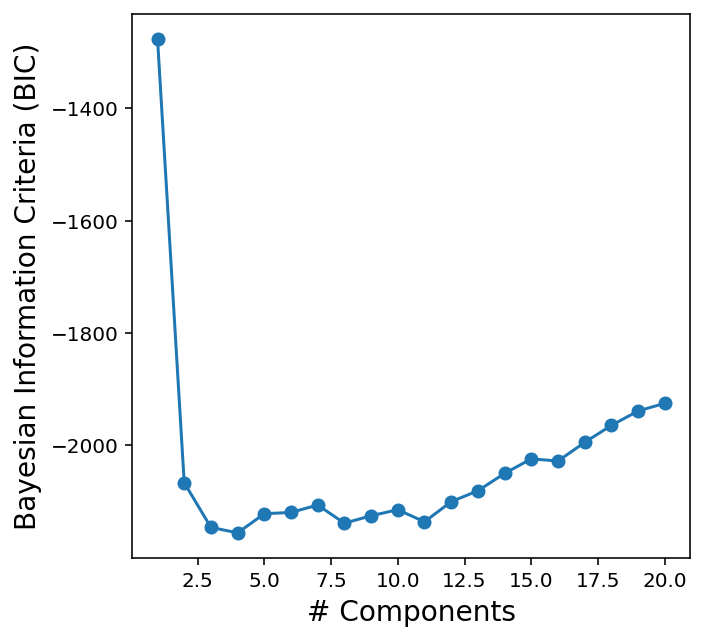

In [252]:
plt.plot(n_components, bic, 'o-', label='BIC')
plt.xlabel('# Components');
plt.ylabel('Bayesian Information Criteria (BIC)');

In [254]:
best = np.argmin(bic)
n = n_components[best]
n

4

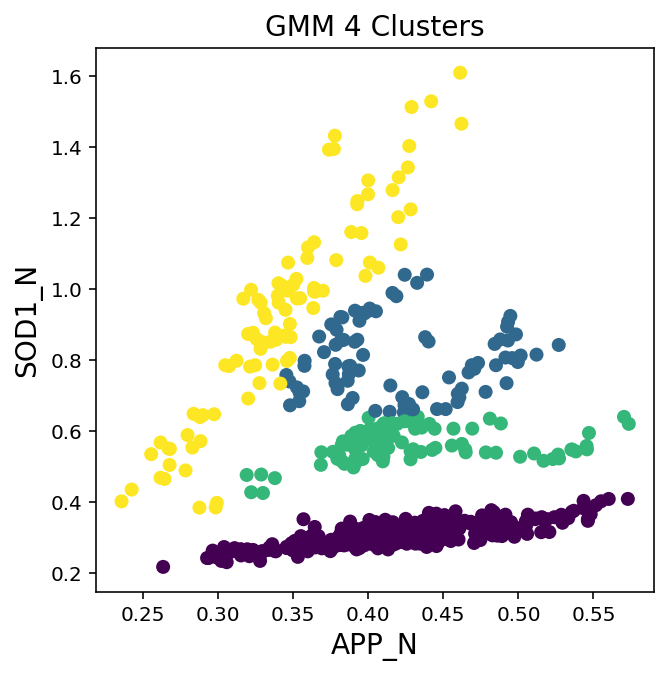

In [255]:
gmm = GaussianMixture(n_components=n)
labels = gmm.fit_predict(X)

plt.scatter(mice['APP_N'], mice['SOD1_N'], c=labels)
plt.xlabel('APP_N')
plt.ylabel('SOD1_N')
plt.title(f'GMM {n} Clusters');